In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [4]:
jpeg_map = pd.read_csv("../measurements_vidvrd/jpeg_small/map.csv")
decom_map= pd.read_csv("../measurements_vidvrd/decomposition_small/map.csv")
reg_map = pd.read_csv("../measurements_vidvrd/regression_small/map.csv")
jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg_small/characteristic.csv")
decom_cha= pd.read_csv("../measurements_vidvrd/decomposition_small/characteristic.csv")
reg_cha = pd.read_csv("../measurements_vidvrd/regression_small/characteristic.csv")

In [5]:
local_map = pd.read_csv("../../dynamic_framework/measurements_vidvrd/local_small/map.csv")
local_map_decom = pd.read_csv("../../dynamic_framework/measurements_vidvrd/local_small_decom/map.csv")

In [6]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_jpeg = snr[np.isnan(snr) ==False]
map_diff_jpeg = map_diff[np.isnan(snr) ==False]
sens_diff_jpeg = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Per-frame mAP drop  [%]')

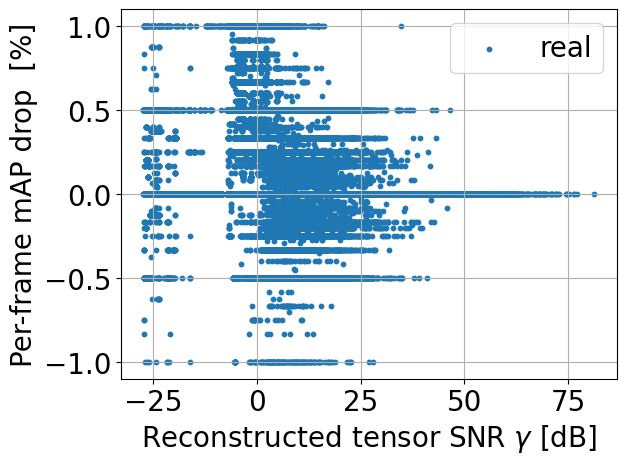

In [7]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_jpeg, map_diff_jpeg, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
# plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

In [8]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [1,2,3,4,5]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()
        

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_reg = snr[np.isnan(snr) ==False]
map_diff_reg = map_diff[np.isnan(snr) ==False]
sens_diff_reg = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Per-frame mAP drop  [%]')

/home/rex/archiconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/rex/archiconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


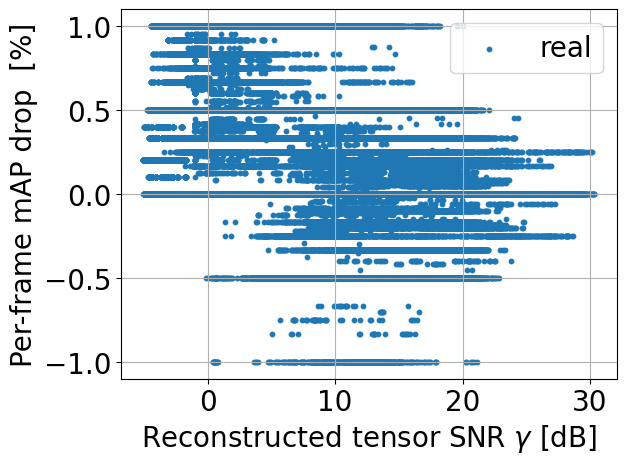

In [9]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_reg, map_diff_reg, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
# plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

In [10]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [2,4,6,8,10]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map_decom["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map_decom["map"].to_numpy() *100
        map_des = (local_map_decom["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map_decom["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map_decom["sensitivity"].to_numpy()*100
        sens_des = (local_map_decom["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_decom = snr[np.isnan(snr) ==False]
map_diff_decom = map_diff[np.isnan(snr) ==False]
sens_diff_decom = sens_diff[np.isnan(snr) ==False]

## Define fitting functions

In [11]:
    
# def fitting_fun(x, a, k):
#     # Ensure a and k are positive
#     if a <= 0 or k <= 0:
#         return np.full_like(x, np.nan)  # Return NaNs if parameters are invalid

#     # Scale `a` properly
#     # a = a / 100  

#     # Compute thresholds
#     thresh = np.exp(1 / (-2 * a * a * k * k)) / np.sqrt(2 * np.pi * a * a)
#     thresh2 = 1 / np.sqrt(2 * np.pi * a * a)
#     # print(thresh)
#     # print(thresh2)
#     # Ensure x is strictly positive to avoid log(0) issues
#     x = np.maximum(x, 1e-10)  

#     # Compute the function safely
#     def second_piece(x):
#         log_term = np.log(np.sqrt(2 * np.pi * a * a) * x)
#         log_term[log_term > 0] = 0  # Ensure log_term is never positive
#         sqrt_term = np.sqrt(np.maximum(-2 * a * a * log_term, 0))  # Prevent negative sqrt
#         return k * sqrt_term

#     # Use correct conditions in np.piecewise
#     return np.piecewise(
#         x, 
#         [x < thresh, (x >= thresh) & (x < thresh2), x >= thresh2], 
#         [1, second_piece, 0]
#     )


In [12]:
    
def fitting_fun(x, a, k):
    # Ensure a and k are positive
    if a <= 0 or k <= 0:
        return np.full_like(x, np.nan)  # Return NaNs if parameters are invalid

    # Compute thresholds
    thresh = k+1

    x = np.maximum(x, 1e-10)  

    # Compute the function safely
    def second_piece(x):
        y = (x-k) ** -a
        return y

    # Use correct conditions in np.piecewise
    return np.piecewise(
        x, 
        [x < thresh, x>= thresh], 
        [1, second_piece]
    )


In [44]:
def keep_top_10_percent(group):
    top_n = max(1, int(len(group) * 0.01))  # Ensure at least one value is kept
    return group.nlargest(top_n, 'y')

def remove_outliers(group):
    Q1 = group['y'].quantile(0.25)
    Q3 = group['y'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['y'] >= lower_bound) & (group['y'] <= upper_bound)]

def get_fitting_params(snrs, drops):
    snrs = snrs[drops >=0]
    drops = drops[drops >=0]

    drops = drops[snrs>=0]
    snrs = snrs[snrs>=0]

    drops = drops[snrs<=50]
    snrs = snrs[snrs<=50]

    # Create DataFrame
    df = pd.DataFrame({'x': snrs, 'y': drops})
    # Number of bins
    n_bins = 20

    # Sort by x values
    df = df.sort_values(by='x')

    # Define bin edges
    df['bin'] = pd.qcut(df['x'], n_bins, labels=False)  # Equal count bins
    
    df_filtered = df.groupby('bin', group_keys=False).apply(remove_outliers)

    df_top_10 = df_filtered.groupby('bin', group_keys=False).apply(keep_top_10_percent)
    # plt.figure()
    # plt.scatter(df_top_10['x'],df_top_10['y'])
    # plt.grid()
    # plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
    # plt.ylabel("mAP drop $D^{mAP}$ [%]")
    params, _ = curve_fit(fitting_fun, df_top_10['x'].to_numpy(), df_top_10['y'].to_numpy(), method="trf")
    return params,df
    

## map fitting

In [60]:
snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg,snr_cleaned_decom ))
map_drop= np.concatenate((map_diff_jpeg,map_diff_reg,map_diff_decom))
# snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg ))
# map_drop= np.concatenate((map_diff_jpeg,map_diff_reg))
param_map, df_iqr = get_fitting_params(snrs,map_drop)

/tmp/ipykernel_3192847/496929691.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby('bin', group_keys=False).apply(remove_outliers)
/tmp/ipykernel_3192847/496929691.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10 = df_filtered.groupby('bin', group_keys=False).apply(keep_top_10_percent)


/tmp/ipykernel_3192847/2927215309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bin', y='y', data=df_iqr, palette='coolwarm',showfliers=True)


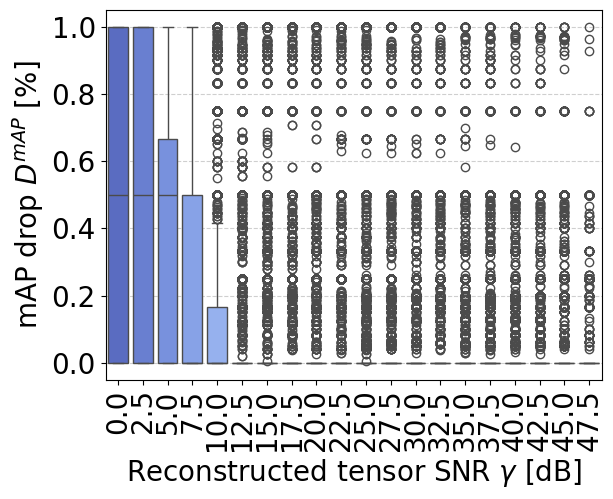

In [42]:
import seaborn as sns

plt.figure()
sns.boxplot(x='bin', y='y', data=df_iqr, palette='coolwarm',showfliers=True)

plt.xticks(np.arange(20), np.arange(20)*2.5,rotation=90)
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("mAP drop $D^{mAP}$ [%]")

plt.grid(axis='y', linestyle='--', alpha=0.6)

In [61]:
param_map

array([2.53733324, 3.86520694])

In [62]:
test_x = np.arange(0,50,0.1)

test_y = []
for x in test_x:
    test_y.append(fitting_fun(x,param_map[0], param_map[1])*100)

/tmp/ipykernel_3192847/474158334.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  p_df = df_iqr.groupby('bin', group_keys=False).apply(remove_outliers)


Text(0, 0.5, 'mAP drop $D^{mAP}$ [%]')

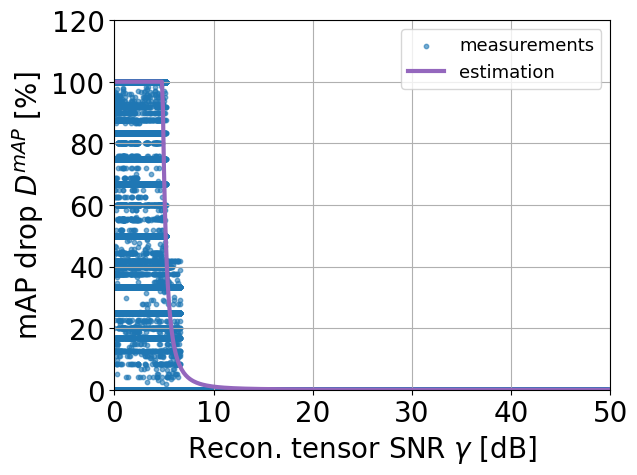

In [63]:
plt.figure()

# plt.scatter(snr_cleaned_jpeg, map_diff_jpeg*100,s =10,color="tab:blue", alpha=0.6,label="jpeg" )
# plt.scatter(snr_cleaned_reg, map_diff_reg*100,s=10,color="tab:orange",  alpha=0.6,label="regression" )
# plt.scatter(snr_cleaned_decom, map_diff_decom*100,color="tab:green", alpha=0.6, s=10,label="decom" )

# plt.scatter(df_iqr["x"], df_iqr["y"]*100,color="tab:green", alpha=0.6, s=10,label="decom" )
# 

p_df = df_iqr.groupby('bin', group_keys=False).apply(remove_outliers)
plt.scatter(p_df["x"], p_df["y"]*100,color="tab:blue", alpha=0.6, s=10,label="measurements" )
plt.plot(test_x, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")
# plt.scatter( map_diff_jpeg*100,snr_cleaned_jpeg,s =10,label="jpeg" )
# plt.scatter( map_diff_reg*100,  snr_cleaned_reg,s=10,label="regression" )
# plt.scatter(map_diff_decom*100, snr_cleaned_decom, s=10,label="decom" )
plt.ylim([0,120])
plt.xlim([0,50])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Recon. tensor SNR $\gamma$ [dB]")
plt.ylabel("mAP drop $D^{mAP}$ [%]")

/tmp/ipykernel_3192847/2965024161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bin', y='y', data=plot_df, palette='coolwarm')


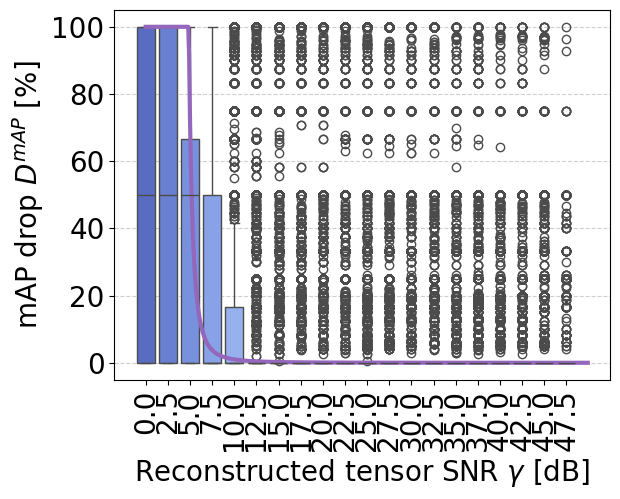

In [64]:
plt.figure()

plot_df = df_iqr.copy()
plot_df["y"] = plot_df['y']*100
sns.boxplot(x='bin', y='y', data=plot_df, palette='coolwarm')
plt.xticks(np.arange(20), np.arange(20)*2.5,rotation=90)
plt.plot(test_x/2.5, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")
# Customization
# plt.xticks(rotation=90)
# plt.xticks(np.arange(20), np.arange(20)*2,rotation=90)
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("mAP drop $D^{mAP}$ [%]")
plt.grid(axis='y', linestyle='--', alpha=0.6)

## Sensitivity fitting

In [65]:
snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg,snr_cleaned_decom ))
sem_drop= np.concatenate((sens_diff_jpeg,sens_diff_reg,sens_diff_decom))
param_map,df_iqr = get_fitting_params(snrs,sem_drop)

/tmp/ipykernel_3192847/496929691.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby('bin', group_keys=False).apply(remove_outliers)
/tmp/ipykernel_3192847/496929691.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10 = df_filtered.groupby('bin', group_keys=False).apply(keep_top_10_percent)


/tmp/ipykernel_3192847/1165683777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bin', y='y', data=df_iqr, palette='coolwarm')


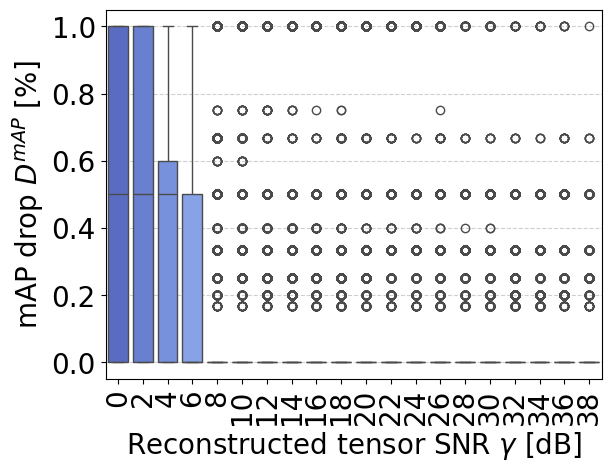

In [32]:
import seaborn as sns

plt.figure()
sns.boxplot(x='bin', y='y', data=df_iqr, palette='coolwarm')

# Customization
# plt.xticks(rotation=90)
plt.xticks(np.arange(20), np.arange(20)*2,rotation=90)
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("mAP drop $D^{mAP}$ [%]")
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [66]:
param_map

array([10.98095938,  2.68807942])

In [67]:
test_x = np.arange(0,50,0.1)

test_y = []
for x in test_x:
    test_y.append(fitting_fun(x,param_map[0], param_map[1])*100)

/tmp/ipykernel_3192847/4087938710.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  p_df = df_iqr.groupby('bin', group_keys=False).apply(remove_outliers)


Text(0, 0.5, 'Sensitivity drop $D^{sen}$ [%]')

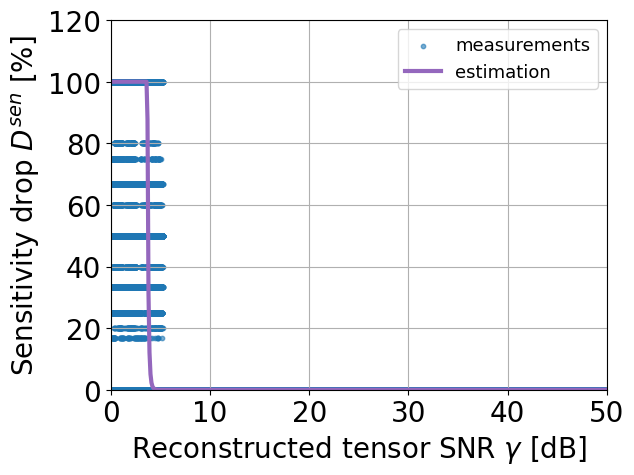

In [68]:
plt.figure()

# plt.scatter(snr_cleaned_jpeg, sens_diff_jpeg*100,s =10,label="jpeg" )
# plt.scatter(snr_cleaned_reg, sens_diff_reg*100,s=10,label="regression" )
# plt.scatter(snr_cleaned_decom, sens_diff_decom*100, s=10,label="decom" )
# 

p_df = df_iqr.groupby('bin', group_keys=False).apply(remove_outliers)
plt.scatter(p_df["x"], p_df["y"]*100,color="tab:blue", alpha=0.6, s=10,label="measurements" )
plt.plot(test_x, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")
plt.xlim([0,50])
plt.ylim([0,120])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Sensitivity drop $D^{sen}$ [%]")

/tmp/ipykernel_3192847/138530588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bin', y='y', data=plot_df, palette='coolwarm')


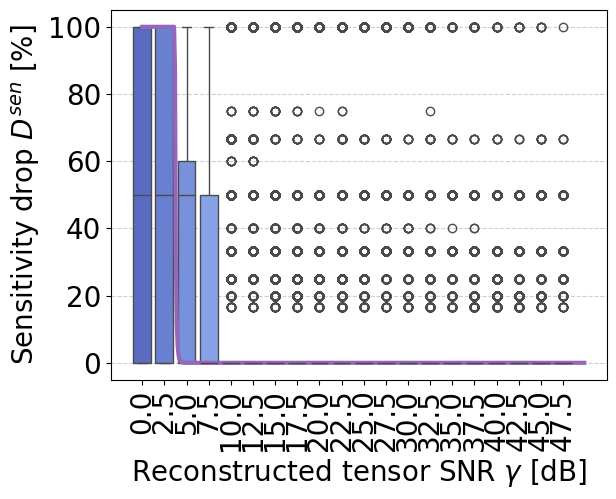

In [69]:
plt.figure()

plot_df = df_iqr.copy()
plot_df["y"] = plot_df['y']*100
sns.boxplot(x='bin', y='y', data=plot_df, palette='coolwarm')
plt.xticks(np.arange(20), np.arange(20)*2.5,rotation=90)
plt.plot(test_x/2.5, test_y, color="tab:purple",linewidth=3.0 ,label="estimation")
# Customization
# plt.xticks(rotation=90)
# plt.xticks(np.arange(20), np.arange(20)*2,rotation=90)
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Sensitivity drop $D^{sen}$ [%]")
plt.grid(axis='y', linestyle='--', alpha=0.6)